In [3]:
from datasets import load_dataset

# Force download and keep a local copy
dataset = load_dataset("Teklia/IAM-line", download_mode="force_redownload")

# The dataset will be cached locally (usually in ~/.cache/huggingface/datasets)
print(dataset)


README.md: 0.00B [00:00, ?B/s]

C:\Users\User\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\datasets--Teklia--IAM-line. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


data/train.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

data/validation.parquet:   0%|          | 0.00/24.7M [00:00<?, ?B/s]

data/test.parquet:   0%|          | 0.00/73.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6482 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/976 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2915 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 6482
    })
    validation: Dataset({
        features: ['image', 'text'],
        num_rows: 976
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 2915
    })
})


# **HAND WRITTEN TEXT GENERATION**

### **SAMPLE DATA**

Text: put down a resolution on the subject


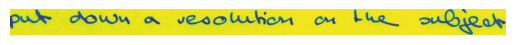

In [17]:
import matplotlib.pyplot as plt

# Pick a sample
sample = dataset['train'][0]

print("Text:", sample['text'])

# Display the handwritten image inline
plt.imshow(sample['image'])
plt.axis("off")
plt.show()


**Install & Import Libraries**

In [8]:
!pip install datasets tensorflow matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from datasets import load_dataset

**Load Dataset**

In [9]:
dataset = load_dataset("Teklia/IAM-line")
texts = [sample['text'] for sample in dataset['train']]
corpus = "\n".join(texts)
print("Corpus length:", len(corpus))
print("Sample text:", texts[0])

Corpus length: 287726
Sample text: put down a resolution on the subject


**Tokenization & Sequence Preparation**

In [10]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts([corpus])
total_chars = len(tokenizer.word_index) + 1
print("Total unique characters:", total_chars)
input_sequences = []
for line in texts:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_chars)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Total unique characters: 55
Shape of X: (274763, 79)
Shape of y: (274763, 55)


**Build the RNN Model**

In [12]:
model = Sequential()
model.add(Embedding(total_chars, 128))   # no input_length
model.add(LSTM(256))
model.add(Dense(total_chars, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_seq_len-1))
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 79, 128)             │           7,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 55)                  │          14,135 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415,415 (1.58 MB)

 Trainable params: 415,415 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

None


 **Train the Model**

Epoch 1/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 1938s 899ms/step - accuracy: 0.3682 - loss: 2.1430 
Epoch 2/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 1493s 695ms/step - accuracy: 0.4717 - loss: 1.7619
Epoch 3/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 1292s 602ms/step - accuracy: 0.5261 - loss: 1.5805
Epoch 4/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 992s 462ms/step - accuracy: 0.5619 - loss: 1.4616 
Epoch 5/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 948s 442ms/step - accuracy: 0.5877 - loss: 1.3769 
Epoch 6/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 1056s 492ms/step - accuracy: 0.6087 - loss: 1.3110
Epoch 7/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 987s 460ms/step - accuracy: 0.6249 - loss: 1.2578 
Epoch 8/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 1048s 488ms/step - accuracy: 0.6384 - loss: 1.2138
Epoch 9/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 964s 449ms/step - accuracy: 0.6500 - loss: 1.1753 
Epoch 10/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 949s 442ms/step - accuracy: 0.6602 - loss: 1.1406 
Epoch 11/20
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 960s 447ms/step - accurac

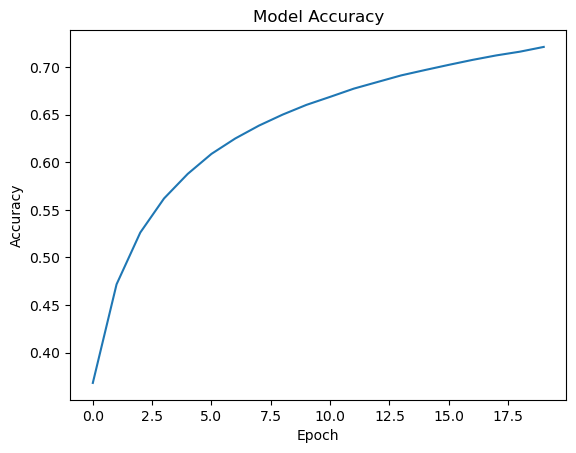

In [13]:
history = model.fit(X, y, epochs=20, batch_size=128, verbose=1)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


Training longer (30–50 epochs) may improve accuracy

In [19]:
model.save("handwritten_text_rnn.keras")
print("Model saved successfully!")

Model saved successfully!


**Text Generation Function**

In [20]:
def generate_text(seed_text, next_chars=200):
    for _ in range(next_chars):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
        output_char = tokenizer.index_word[predicted]
        seed_text += output_char
    return seed_text

**Test the Model**

In [21]:
# Insert your own input prompt
seed = "put down a resolution"
generated = generate_text(seed, next_chars=200)

print("Generated text:\n", generated)


Generated text:
 put down a resolution with a view in a slightest effect . the first wife's brother-in-law , the commonwealth is a superital should be altogether clearer and most of his press conference in the commonwealth is a superital 


In [23]:
from PIL import Image, ImageDraw, ImageFont

def render_handwritten(text, font_path="handwriting.ttf", output="handwritten_output.png"):
    img = Image.new("RGB", (800, 200), color="white")
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("arial.ttf", 32)
    draw.text((10, 50), text, font=font, fill="black")
    img.save(output)
    print("Saved:", output)

render_handwritten("put down a resolution")


Saved: handwritten_output.png
